In [39]:
!pip install spacy

In [40]:
!python -m spacy download en_core_web_md

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [41]:
!pip install wordcloud

In [42]:
import pandas as pd
import numpy as np
import spacy
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

In [43]:
data = pd.read_csv("Elon_musk.csv",encoding='cp1252',error_bad_lines=False)
data

C:\Users\sneha\AppData\Local\Temp\ipykernel_3192\713757726.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv("Elon_musk.csv",encoding='cp1252',error_bad_lines=False)


,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [44]:
data.shape

(1999, 2)

In [45]:
data.drop(data.iloc[:,0:1], axis = 1)

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [46]:
df = [y.strip() for y in data['Text']]
df

['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It’s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',
 '@fr

In [47]:
len(data)

1999

In [48]:
#joining the list into one str/text
text = ''.join(df)
text

'@kunalb11 I’m an alien@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?@joerogan @Spotify Great interview!@gtera27 Doge is underestimated@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!Happy New Year of the Ox! https://t.co/9WFKMYu2ojFrodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely@GiveDirectly Just sent someJust agree to do Clubhouse with @kanyewesthttps://t.co/3rWE9uHSTS@geoffkeighley @UnrealEngine It’s getting realBought some Dogecoin for lil X, so he can be a toddler hodler@JoshManMode He definitely has issues, but the sentencing seems a bit high@freewalletorg Thanks for fixing@freewalletorg Please unlock my account@AstroJordy <U+0001F923><U+0001F923>This is true p

In [49]:
len(text)

156807

In [50]:
no_punc_text = text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'kunalb11 I’m an alienIDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried itjoerogan Spotify Great interviewgtera27 Doge is underestimatedteslacn Congratulations Tesla China for amazing execution last year Now on to the next for even moreHappy New Year of the Ox httpstco9WFKMYu2ojFrodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrMOwenSparks flcnhvy anonyx10 Haha thanks flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocationThe most entertaining outcome is the most likelyGiveDirectly Just sent someJust agree to do Clubhouse with kanyewesthttpstco3rWE9uHSTSgeoffkeighley UnrealEngine It’s getting realBought some Dogecoin for lil X so he can be a toddler hodlerJoshManMode He definitely has issues but the sentencing seems a bit highfreewalletorg Thanks for fixingfreewalletorg Please unlock my accountAstroJordy U0001F923U0001F923This is true power haha httpstcoFc9uhQSd7Ofreewalletorg Any crypto wallet t

In [51]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [52]:
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
text_tokens

['kunalb11',
 'I',
 '’',
 'm',
 'an',
 'alienIDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'itjoerogan',
 'Spotify',
 'Great',
 'interviewgtera27',
 'Doge',
 'is',
 'underestimatedteslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'moreHappy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2ojFrodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'httpstcozGxJFDzzrMOwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocationThe',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likelyGiveDirectly',
 'Just',
 'sent',
 'someJust',
 'agree',
 'to',
 'do',
 'Clubhouse',
 'with',
 'kanyewesthttpstco3r

In [53]:
len(text_tokens)

19810

In [54]:
text_tokens[0:50]

['kunalb11',
 'I',
 '’',
 'm',
 'an',
 'alienIDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'itjoerogan',
 'Spotify',
 'Great',
 'interviewgtera27',
 'Doge',
 'is',
 'underestimatedteslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'moreHappy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2ojFrodo',
 'was',
 'the',
 'underdoge',
 'All']

In [55]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [56]:
#Remove stopwords
from nltk.corpus import stopwords
my_stop_words = stopwords.words('english')
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [57]:
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['kunalb11', 'I', '’', 'alienIDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'itjoerogan', 'Spotify', 'Great', 'interviewgtera27', 'Doge', 'underestimatedteslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'moreHappy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2ojFrodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'httpstcozGxJFDzzrMOwenSparks', 'flcnhvy']


In [58]:
len(no_stop_tokens)

14232

In [59]:
#normaliz the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['kunalb11', 'i', '’', 'alienidaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'itjoerogan', 'spotify', 'great', 'interviewgtera27', 'doge', 'underestimatedteslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now']


In [60]:
#stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:50])

['kunalb11', 'i', '’', 'alienidaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'itjoerogan', 'spotifi', 'great', 'interviewgtera27', 'doge', 'underestimatedteslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'morehappi', 'new', 'year', 'ox', 'httpstco9wfkmyu2ojfrodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrmowenspark', 'flcnhvi', 'anonyx10', 'haha', 'thank', 'flcnhvi', 'anonyx10', 'inde', 'tweet', 'definit', 'repres', 'realworld']


In [61]:
ps.stem('amazing')

'amaz'

In [62]:
!python -m spacy download en

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [63]:
#nlp english model of spacy libarray
nlp = spacy.load('en_core_web_sm')

In [64]:
#lemmas being one of them but mostly pos which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:10])

kunalb11 I ’ alienIDAACarmack Ray tracing Cyberpunk HDR nextlevel Have


In [65]:
lemmas = [token.lemma_ for token in doc]
lemmas[0:10]

['kunalb11',
 'I',
 "'",
 'alienidaacarmack',
 'Ray',
 'trace',
 'Cyberpunk',
 'HDR',
 'nextlevel',
 'have']

In [66]:
cleaned_comment = ' '.join(lemmas)
cleaned_comment

'kunalb11 I \' alienidaacarmack Ray trace Cyberpunk HDR nextlevel have try itjoerogan spotify great interviewgtera27 Doge underestimatedteslacn Congratulations Tesla China amazing execution last year now next even moreHappy New Year Ox httpstco9WFKMYu2ojFrodo underdoge all thought would fail himself httpstcozgxjfdzzrmowenspark flcnhvy anonyx10 Haha thank flcnhvy anonyx10 Indeed Tweets definitely represent realworld time allocationthe entertaining outcome likelygivedirectly just send somejust agree Clubhouse kanyewesthttpstco3rWE9uHSTSgeoffkeighley UnrealEngine it \' getting realbought Dogecoin lil x toddler hodlerjoshmanmode he definitely issue sentencing seem bit highfreewalletorg thank fixingfreewalletorg please unlock accountastrojordy u0001f923u0001f923this true power haha httpstcoFc9uhQSd7Ofreewalletorg any crypto wallet \' give private key avoid costsfreewalletorg your app sucksrt SpaceX NASA select Falcon Heavy launch first two element lunar gateway together one mission httpstco

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
comments = cv.fit_transform(lemmas)

In [68]:
sum_words = comments.sum(axis=0)
wd_df = pd.DataFrame({'word':cv.get_feature_names(),'count':np.asarray(comments.sum(axis=0)).flatten().tolist()})
wd_df.sort_values('count',ascending=False)

C:\Users\sneha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,word,count
4364,spacex,232
282,amp,218
4651,tesla,156
5274,we,89
2746,it,73
...,...,...
2197,httpstcoi046jbmc7o,1
2196,httpstcohspkw3zk1ygerberkawasaki,1
2195,httpstcohscbef8mnfspexcast,1
2194,httpstcohprgptt6ruvasu42698392,1


In [69]:
cv.vocabulary_

{'kunalb11': 2863,
 'alienidaacarmack': 246,
 'ray': 3856,
 'trace': 4844,
 'cyberpunk': 1012,
 'hdr': 1845,
 'nextlevel': 3351,
 'have': 1840,
 'try': 4905,
 'itjoerogan': 2752,
 'spotify': 4399,
 'great': 1741,
 'interviewgtera27': 2720,
 'doge': 1173,
 'underestimatedteslacn': 5106,
 'congratulations': 888,
 'tesla': 4651,
 'china': 769,
 'amazing': 274,
 'execution': 1418,
 'last': 2884,
 'year': 5416,
 'now': 3397,
 'next': 3350,
 'even': 1372,
 'morehappy': 3250,
 'new': 3348,
 'ox': 3527,
 'httpstco9wfkmyu2ojfrodo': 2031,
 'underdoge': 5105,
 'all': 249,
 'thought': 4740,
 'would': 5380,
 'fail': 1456,
 'himself': 1891,
 'httpstcozgxjfdzzrmowenspark': 2546,
 'flcnhvy': 1543,
 'anonyx10': 304,
 'haha': 1782,
 'thank': 4692,
 'indeed': 2644,
 'tweets': 4929,
 'definitely': 1068,
 'represent': 3938,
 'realworld': 3883,
 'time': 4761,
 'allocationthe': 253,
 'entertaining': 1327,
 'outcome': 3501,
 'likelygivedirectly': 2949,
 'just': 2816,
 'send': 4139,
 'somejust': 4312,
 'agree'

In [70]:
comments.toarray().shape

(14778, 5504)

In [71]:
cv_ngram = CountVectorizer(analyzer = 'word',ngram_range = (1,3))
ngram_comments = cv_ngram.fit_transform(lemmas)

In [72]:
cv_ngram.get_feature_names()

C:\Users\sneha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['005',
 '10',
 '100',
 '1000',
 '10000',
 '107',
 '10x',
 '11',
 '112charliemunger00',
 '11erdayastronaut',
 '11thhour',
 '12',
 '122',
 '13',
 '130pm',
 '13ericralph31',
 '13model',
 '13teslarati',
 '14',
 '140pm',
 '149watt',
 '14yearold',
 '15',
 '150',
 '155',
 '16',
 '162',
 '17',
 '17businessinsider',
 '18',
 '1880',
 '1b',
 '1st',
 '20',
 '200',
 '2007',
 '2008',
 '2009',
 '2012',
 '2017',
 '2020',
 '2020erdayastronaut',
 '2021',
 '2024',
 '2026',
 '2030',
 '20k',
 '210',
 '218',
 '21st',
 '22',
 '225',
 '23',
 '230',
 '24',
 '240am',
 '25',
 '250',
 '250kw',
 '25d',
 '25gunsteslacomchadhurley',
 '25k',
 '25th',
 '28',
 '28ai',
 '28delayslater',
 '28th',
 '29',
 '2k',
 '2nd',
 '2v',
 '30',
 '300',
 '301',
 '304',
 '304l',
 '31',
 '33',
 '330',
 '360',
 '37',
 '3800',
 '394',
 '39a',
 '3brianheide',
 '3d',
 '3rd',
 '40',
 '400',
 '4227',
 '42u0001f917rt',
 '430',
 '43rd',
 '445pm',
 '448',
 '4530000',
 '45thspacewing',
 '4680',
 '479000',
 '48',
 '4d',
 '50',
 '50000',
 '50k',
 

In [73]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(25,19))
    plt.imshow(wordcloud)

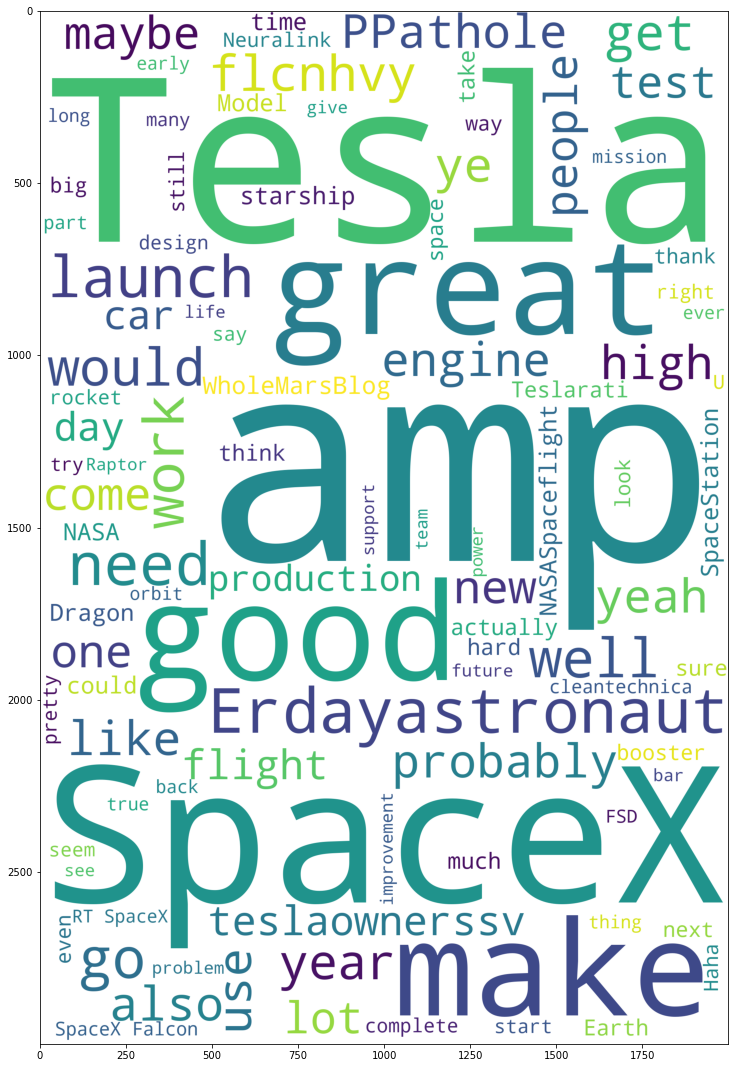

In [74]:
wordcloud = WordCloud(background_color = 'white',stopwords=my_stop_words,height = 3000,width = 2000, max_words=100).generate(cleaned_comment)
plot_cloud(wordcloud)